In [24]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15,6)

In [25]:
data = pd.read_csv('ALL_MONTHS_FINAL.csv')
data = data.iloc[:,1:]
data = data.set_index('period')

In [26]:
data.index = pd.to_datetime(data.index)

In [27]:
data.head()

Year  Month  Day  Hour      AP    C6    CO     NO    NO2  \
period                                                                          
2016-01-01 00:00:00  2016      1    1     0  953.25  0.46  1.51  20.11  68.99   
2016-01-01 01:00:00  2016      1    1     1  952.98  0.27  1.22  20.50  68.79   
2016-01-01 02:00:00  2016      1    1     2  952.69  0.14  1.05  20.89  66.25   
2016-01-01 03:00:00  2016      1    1     3  952.45  0.17  0.98  21.09  66.43   
2016-01-01 04:00:00  2016      1    1     4  952.43  0.12  0.93  21.21  67.40   

                       NOX  ...    PM25   RF     RH     RT    SO2    SR   TOL  \
period                      ...                                                 
2016-01-01 00:00:00  89.10  ...   75.25  0.0  58.18  17.72  40.58  0.11  3.23   
2016-01-01 01:00:00  89.29  ...  101.77  0.0  61.08  16.91  40.46  0.02  2.18   
2016-01-01 02:00:00  87.13  ...   83.33  0.0  62.52  16.43  38.97  0.01  1.65   
2016-01-01 03:00:00  87.51  ...   61.98  0.0  64.72  15.66  39.07  0.00  1.30   
2016-01-01 04:00:00  88.61  ...   69.20  0.0  68.06  14.93  39.65  0.00  1.15   

                        WD    WS   XYL  
period                                  
2016-01-01 00:00:00  16.39  0.41  2.35  
2016-01-01 01:00:00  16.33  0.53  1.53  
2016-01-01 02:00:00  16.30  0.45  1.08  
2016-01-01 03:00:00  16.25  0.29  0.76  
2016-01-01 04:00:00  16.23  0.28  0.60  

[5 rows x 22 columns]

In [28]:
data = data.drop(['Year','Month','Day','Hour'], axis= 1)

In [29]:
data = data.resample('D').mean()

In [30]:
AP = data.loc[:,['AP']]
C6 = data.loc[:,['C6']]
CO = data.loc[:,['CO']]
NO = data.loc[:,['NO']]
NO2 = data.loc[:,['NO2']]
NOX = data.loc[:,['NOX']]
O3 = data.loc[:,['O3']]
PM10 = data.loc[:,['PM10']]
PM25 = data.loc[:,['PM25']]
RF = data.loc[:,['RF']]
RH = data.loc[:,['RH']]
RT = data.loc[:,['RT']]
SO2 = data.loc[:,['SO2']]
SR = data.loc[:,['SR']]
TOL = data.loc[:,['TOL']]
WD = data.loc[:,['WD']]
WS = data.loc[:,['WS']]
XYL = data.loc[:,['XYL']]

In [31]:
propertylist = ['AP','C6','CO','NO','NO2','NOX','O3','PM10','PM25','RF','RH','RT','SO2','SR','TOL'
               'WD','WS','XYL']

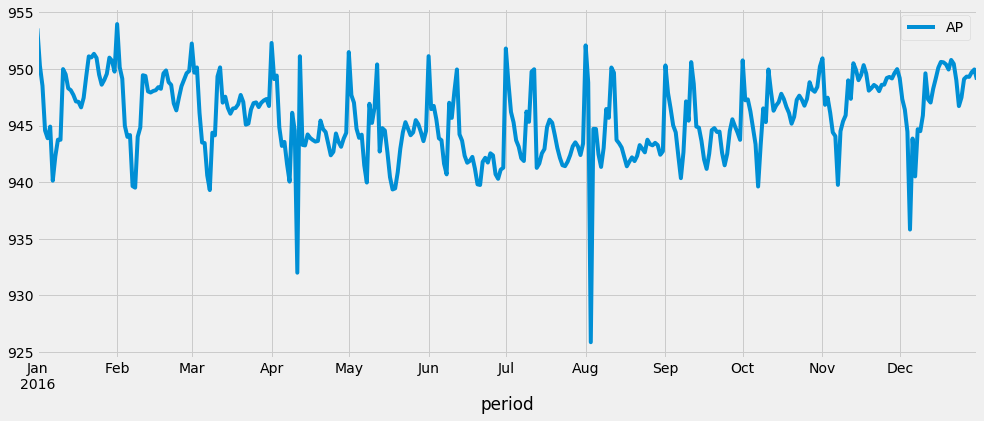

In [32]:
AP.plot()
plt.show()

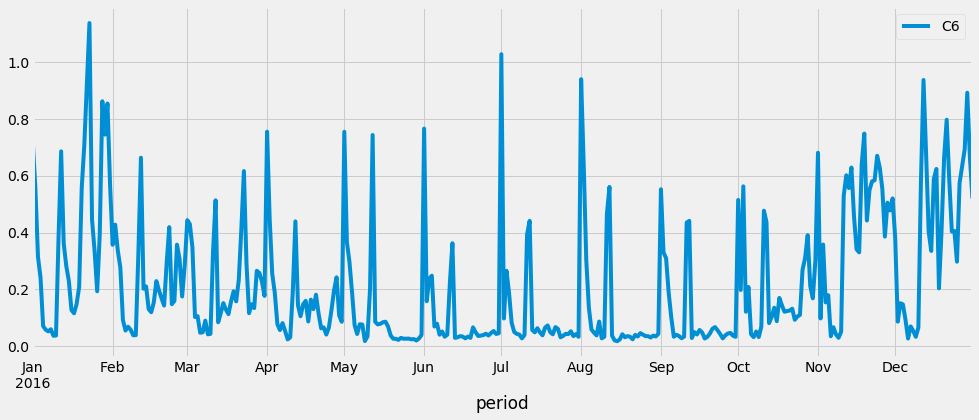

In [33]:
C6.plot()
plt.show()

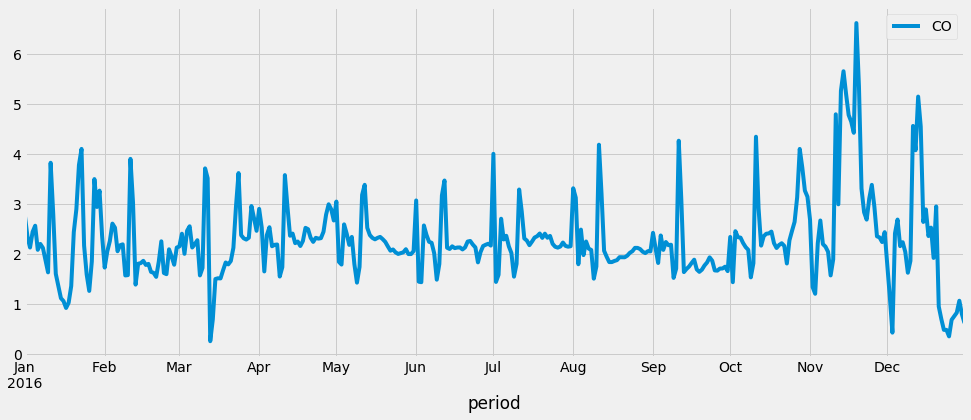

In [34]:
CO.plot()
plt.show()

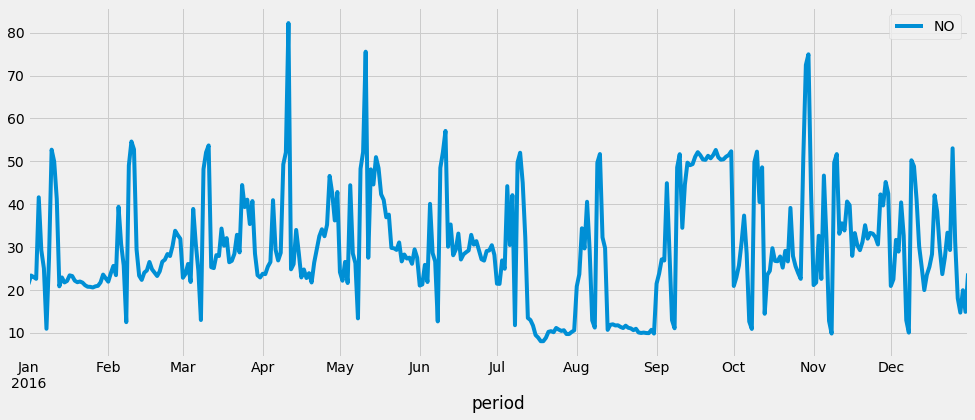

In [35]:
NO.plot()
plt.show()

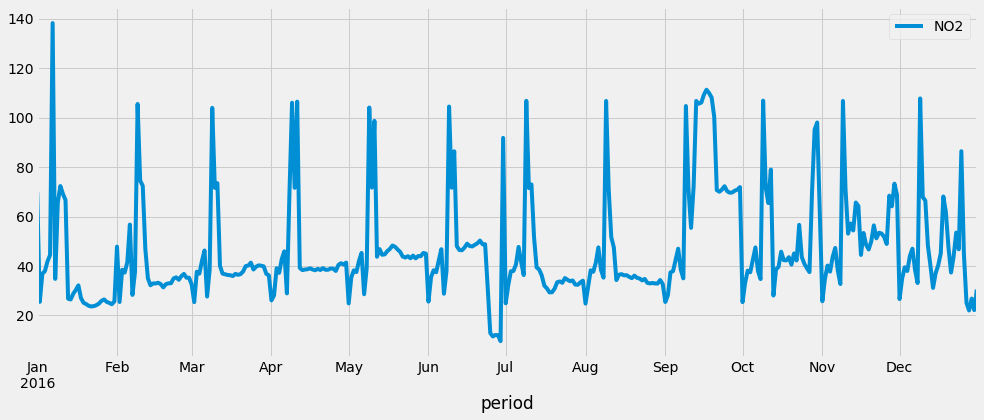

In [36]:
NO2.plot()
plt.show()

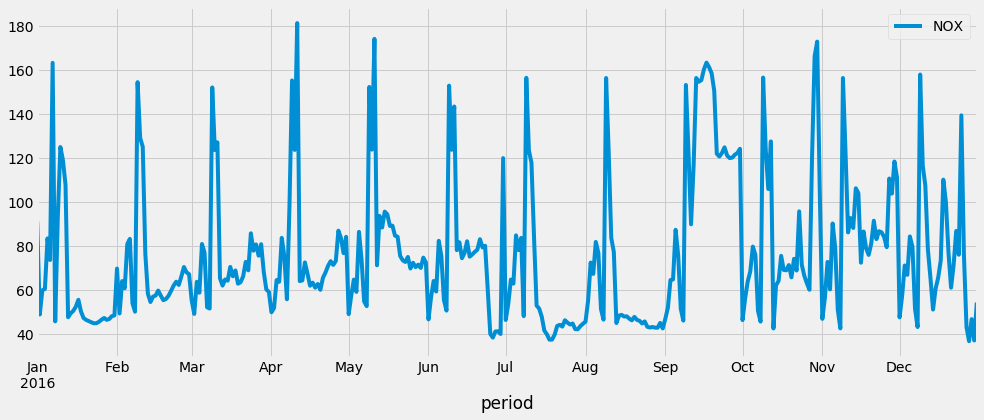

In [37]:
NOX.plot()
plt.show()

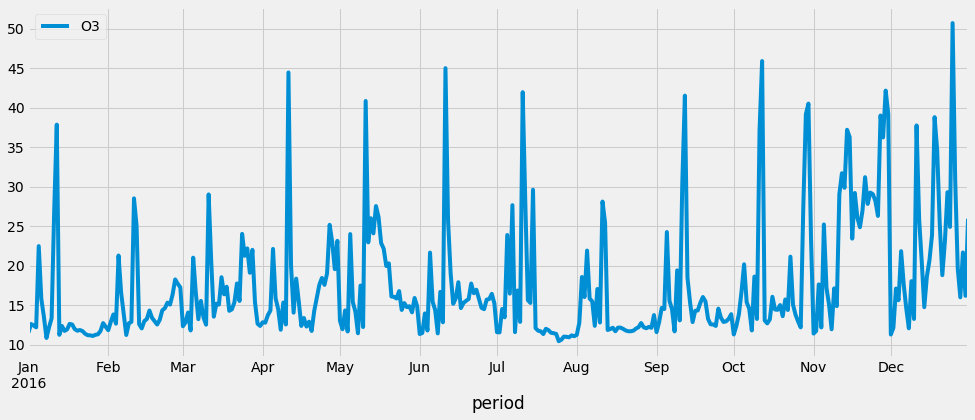

In [38]:
O3.plot()
plt.show()

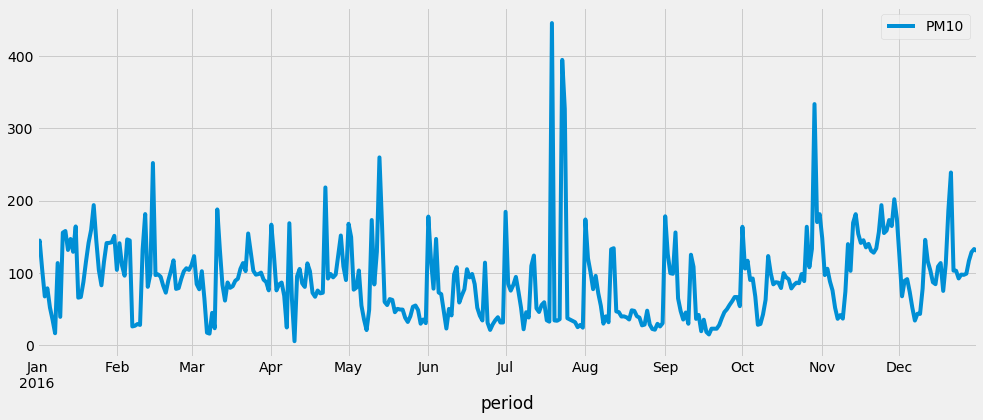

In [39]:
PM10.plot()
plt.show()

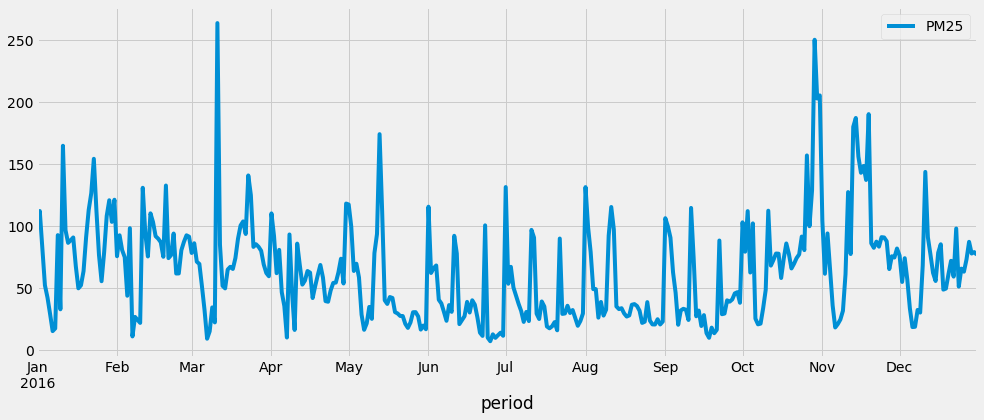

In [40]:
PM25.plot()
plt.show()

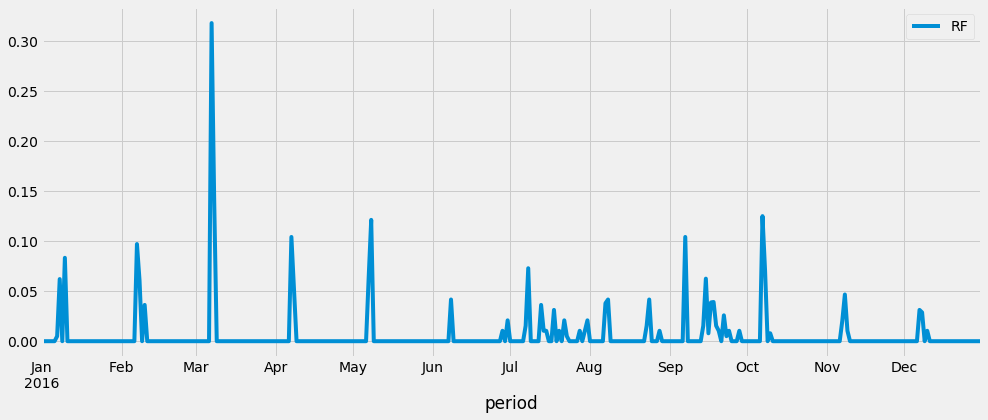

In [41]:
RF.plot()
plt.show()

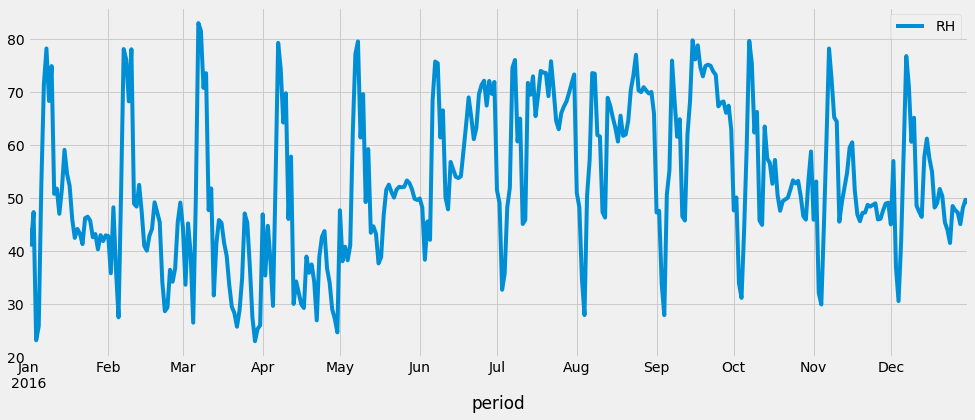

In [42]:
RH.plot()
plt.show()

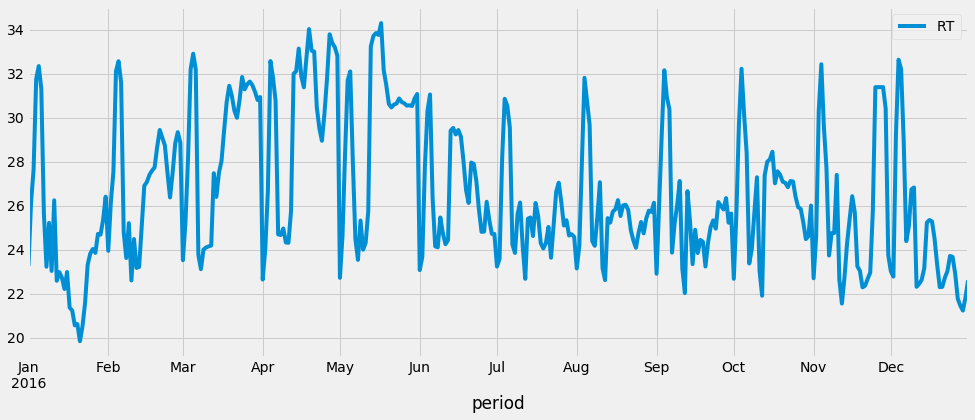

In [43]:
RT.plot()
plt.show()

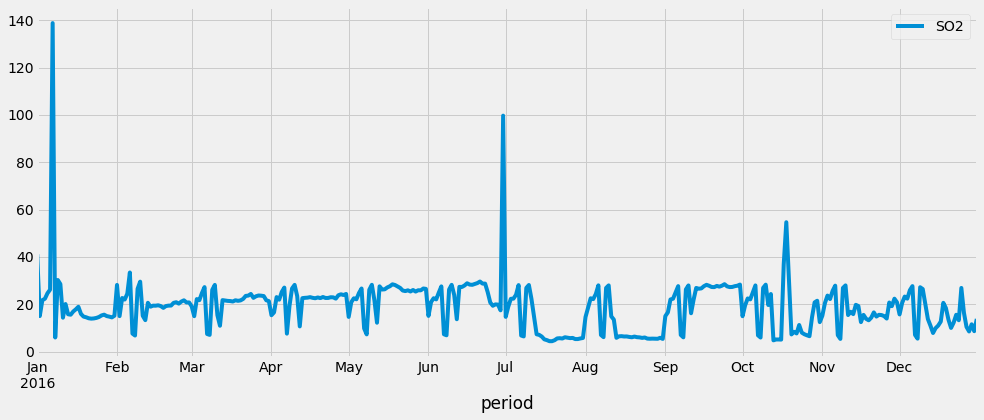

In [44]:
SO2.plot()
plt.show()

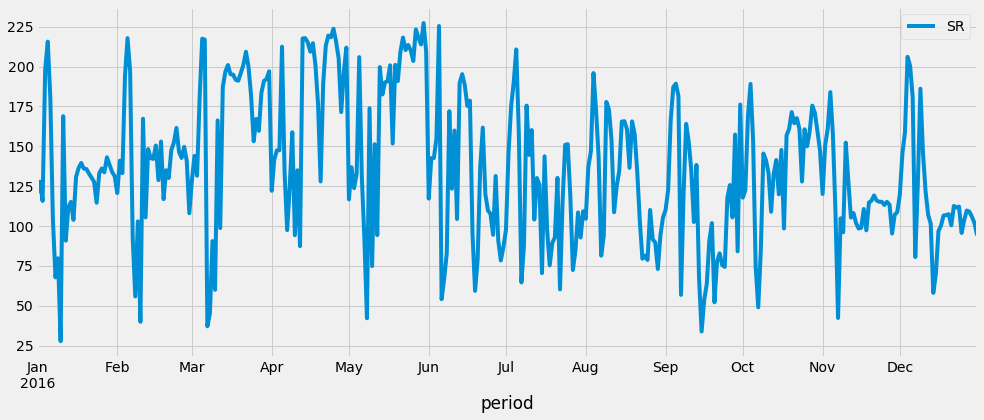

In [45]:
SR.plot()
plt.show()

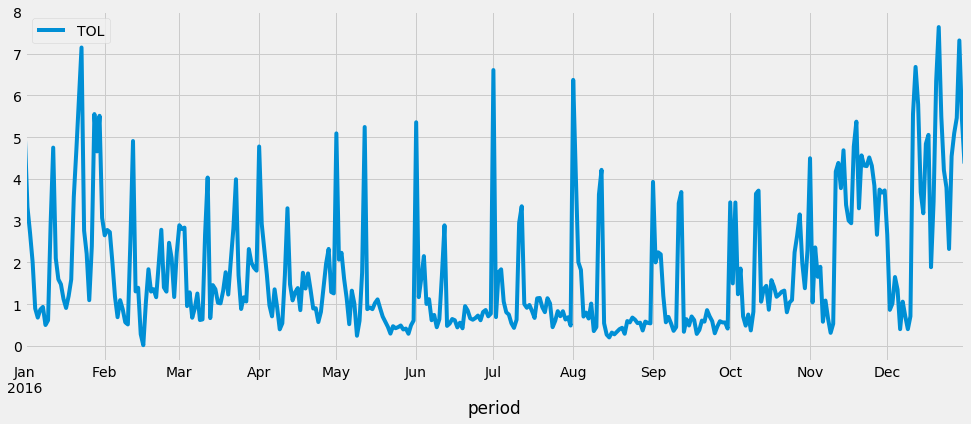

In [46]:
TOL.plot()
plt.show()

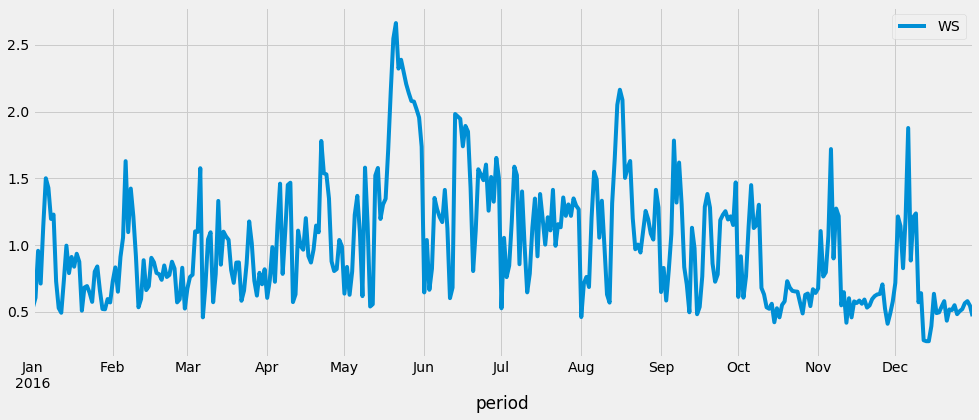

In [47]:
WS.plot()
plt.show()

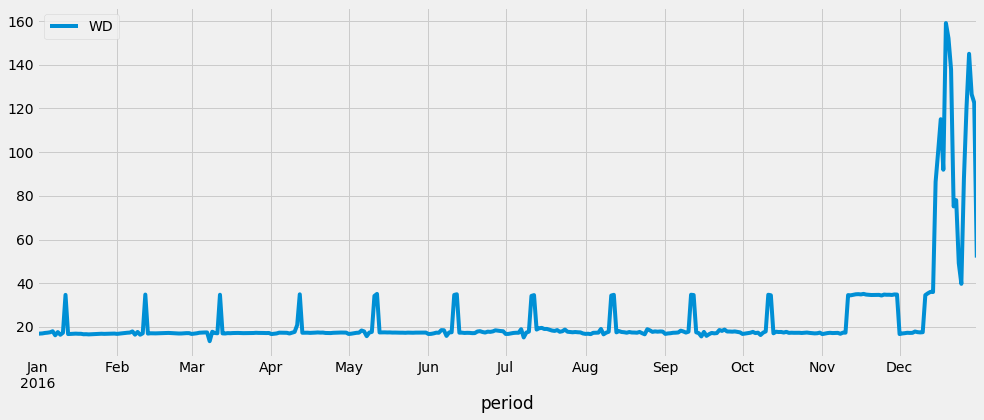

In [48]:
WD.plot()
plt.show()

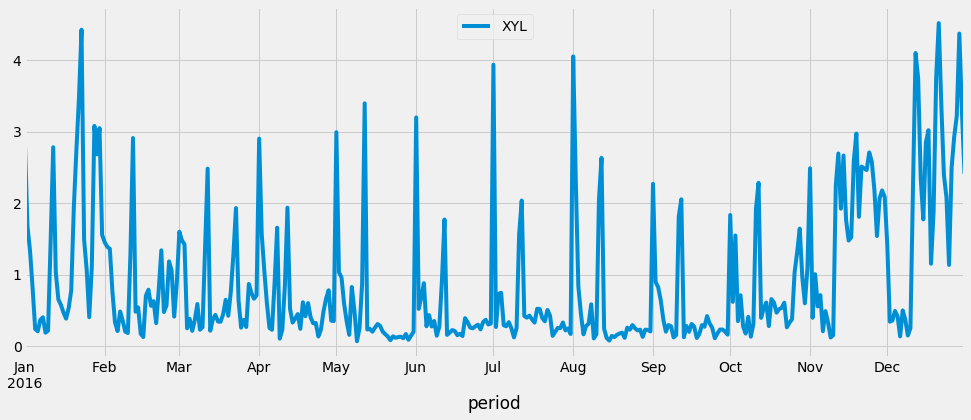

In [49]:
XYL.plot()
plt.show()

In [119]:
from statsmodels.tsa.stattools import adfuller
def teststationarity(timeseries):
    
    #determining rolling stats
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    #print(rolmean)
    #print(rolstd)
    
    #plotting rolling mean data
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling standard')
    plt.legend(loc = 'best')
    plt.title("Rolling mean")
    plt.show(block = False)
    
    #applying dickey fuller test
    print("Results of Dickey Fuller Test: ")
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#teststationarity(ts)

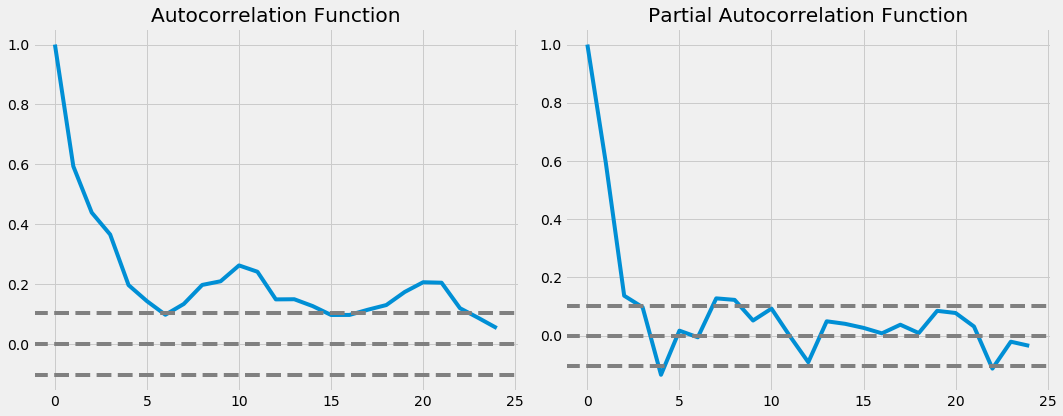

In [147]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(AP, nlags = 24)
lag_pacf = pacf(AP, nlags = 24, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(AP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(AP)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(AP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(AP)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [181]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [192]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(AP,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:6039.7203819473625
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:5650.965505632478
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:2022.3166817010724
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:1735.6816024328675
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:2029.9288204865443
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:1895.2408064152548
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:1776.4702611731932
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:1745.995942924213
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:5527.383612720779
ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:5195.980446273799
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:1931.404444700681
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:1637.3917058510212
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:1943.7412904116177
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:1775.5859232583753
ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:1701.541249342948
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:1637.3723362664193
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:1848.3944975520099
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:1741.219652114067

In [194]:
#ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1680.6461895400541
mod = sm.tsa.statespace.SARIMAX(AP,
                                            order=(3,0,23),
                                            seasonal_order=(0,1,1,24),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}24 - AIC:{}'.format((3,0,23), (1,1,1,24), results.aic))

ARIMA(3, 0, 23)x(1, 1, 1, 24)24 - AIC:1491.0646656695737


In [183]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1040      6.735     -0.015      0.988     -13.305      13.097
ar.L2         -0.0099      1.458     -0.007      0.995      -2.867       2.847
ma.L1         -0.5037      6.707     -0.075      0.940     -13.650      12.642
ma.L2         -0.2412      3.932     -0.061      0.951      -7.947       7.465
ma.L3          0.1047      1.779      0.059      0.953      -3.382       3.592
ma.L4         -0.2175      0.837     -0.260      0.795      -1.858       1.423
ma.L5         -0.0656      1.519     -0.043      0.966      -3.042       2.911
ma.L6         -0.1950      0.532     -0.366      0.714      -1.238       0.848
ma.L7         -0.0191      1.278     -0.015      0.988      -2.525       2.486
ma.L8         -0.0039      0.310     -0.013      0.990      -0.612       0.604
ma.L9         -0.0092      0.150     -0.061      0.9

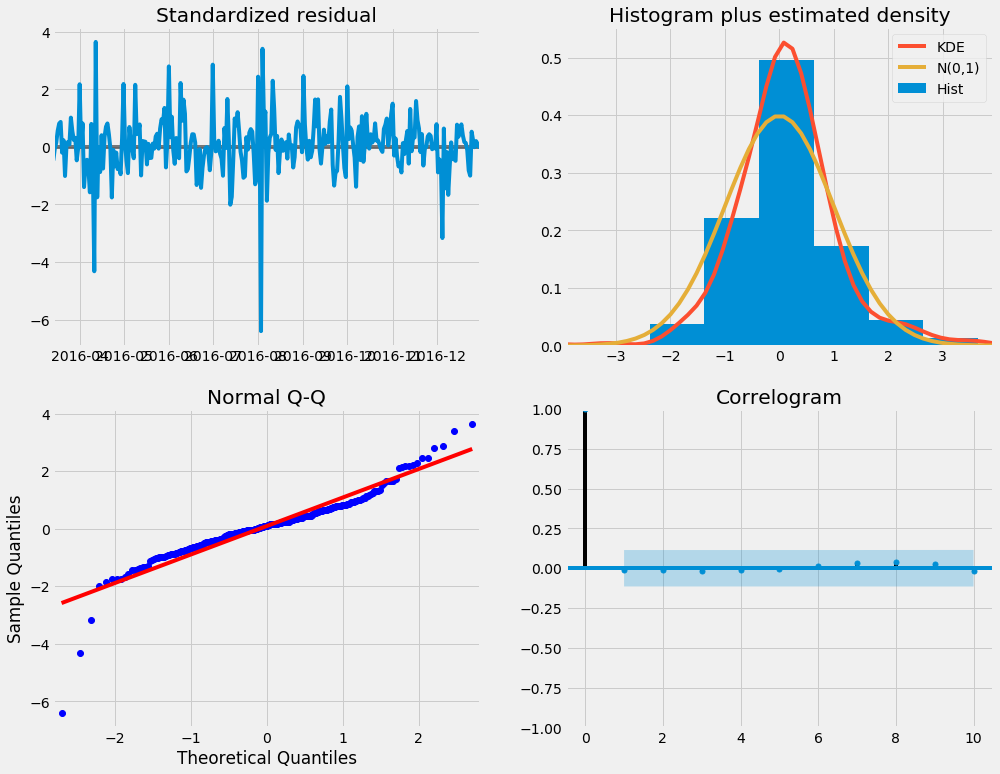

In [184]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [185]:
pred = results.get_prediction(start=pd.to_datetime('2016-08-01'), dynamic=False)
pred_ci = pred.conf_int()

In [186]:
pred_ci

lower AP    upper AP
period                            
2016-08-01  940.271526  950.789184
2016-08-02  940.919278  951.434795
2016-08-03  937.770682  948.285598
2016-08-04  930.348037  940.826355
2016-08-05  936.963927  947.427067
2016-08-06  933.938678  944.401800
2016-08-07  941.104184  951.567118
2016-08-08  938.381105  948.843570
2016-08-09  940.362868  950.821490
2016-08-10  939.255810  949.710894
2016-08-11  938.771944  949.221771
2016-08-12  940.922482  951.371894
2016-08-13  938.771525  949.219883
2016-08-14  937.186279  947.631985
2016-08-15  940.249263  950.693927
2016-08-16  937.350676  947.795206
2016-08-17  935.483068  945.926945
2016-08-18  936.960981  947.402743
2016-08-19  936.951776  947.392649
2016-08-20  936.198262  946.638794
2016-08-21  938.179817  948.619231
2016-08-22  936.899203  947.336064
2016-08-23  937.770010  948.204964
2016-08-24  937.241875  947.676597
2016-08-25  940.431395  950.864675
2016-08-26  939.070296  949.503423
2016-08-27  936.233932  946.665571
2016-08-28  935.920782  946.321773
2016-08-29  936.068000  946.457457
2016-08-30  935.537732  945.927189
...                ...         ...
2016-12-02  944.531642  954.747889
2016-12-03  942.431794  952.644387
2016-12-04  940.682677  950.895226
2016-12-05  938.953915  949.165976
2016-12-06  937.076834  947.288886
2016-12-07  939.151276  949.361898
2016-12-08  940.030414  950.240564
2016-12-09  943.733240  953.943027
2016-12-10  942.526804  952.736504
2016-12-11  944.098141  954.307070
2016-12-12  943.319538  953.528038
2016-12-13  943.010667  953.219153
2016-12-14  944.395814  954.603943
2016-12-15  942.028961  952.236198
2016-12-16  944.076200  954.282624
2016-12-17  943.952311  954.158677
2016-12-18  943.437467  953.643334
2016-12-19  944.260124  954.465509
2016-12-20  944.401976  954.607111
2016-12-21  945.339716  955.544849
2016-12-22  945.641882  955.846423
2016-12-23  946.028854  956.233381
2016-12-24  944.211643  954.415664
2016-12-25  941.002067  951.205555
2016-12-26  943.426636  953.616937
2016-12-27  944.253932  954.439740
2016-12-28  943.676809  953.862411
2016-12-29  944.324538  954.509217
2016-12-30  944.865064  955.049473
2016-12-31  943.714950  953.896057

[153 rows x 2 columns]

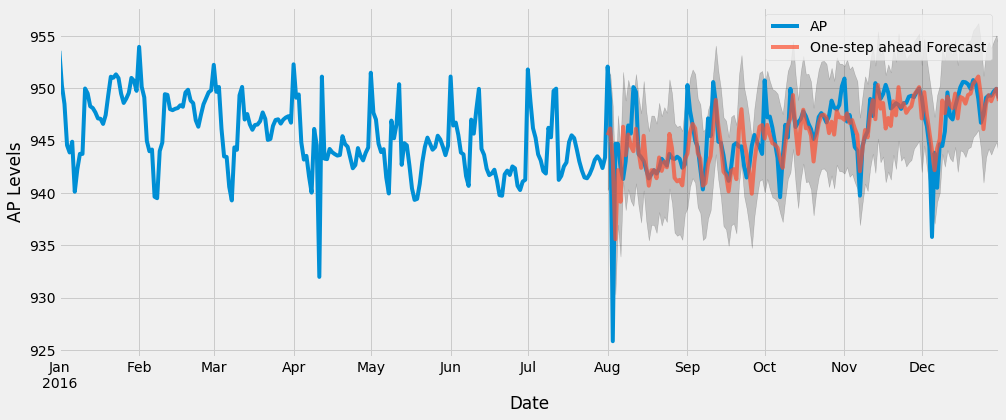

In [187]:
ax = AP.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('AP Levels')
plt.legend()

plt.show()

In [188]:
y_forecasted = pred.predicted_mean
y_truth = AP['2016-08-01':]

from sklearn.metrics import mean_squared_error
# Compute the mean square error
mse = mean_squared_error(y_forecasted,y_truth)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7.02


In [189]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-08-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

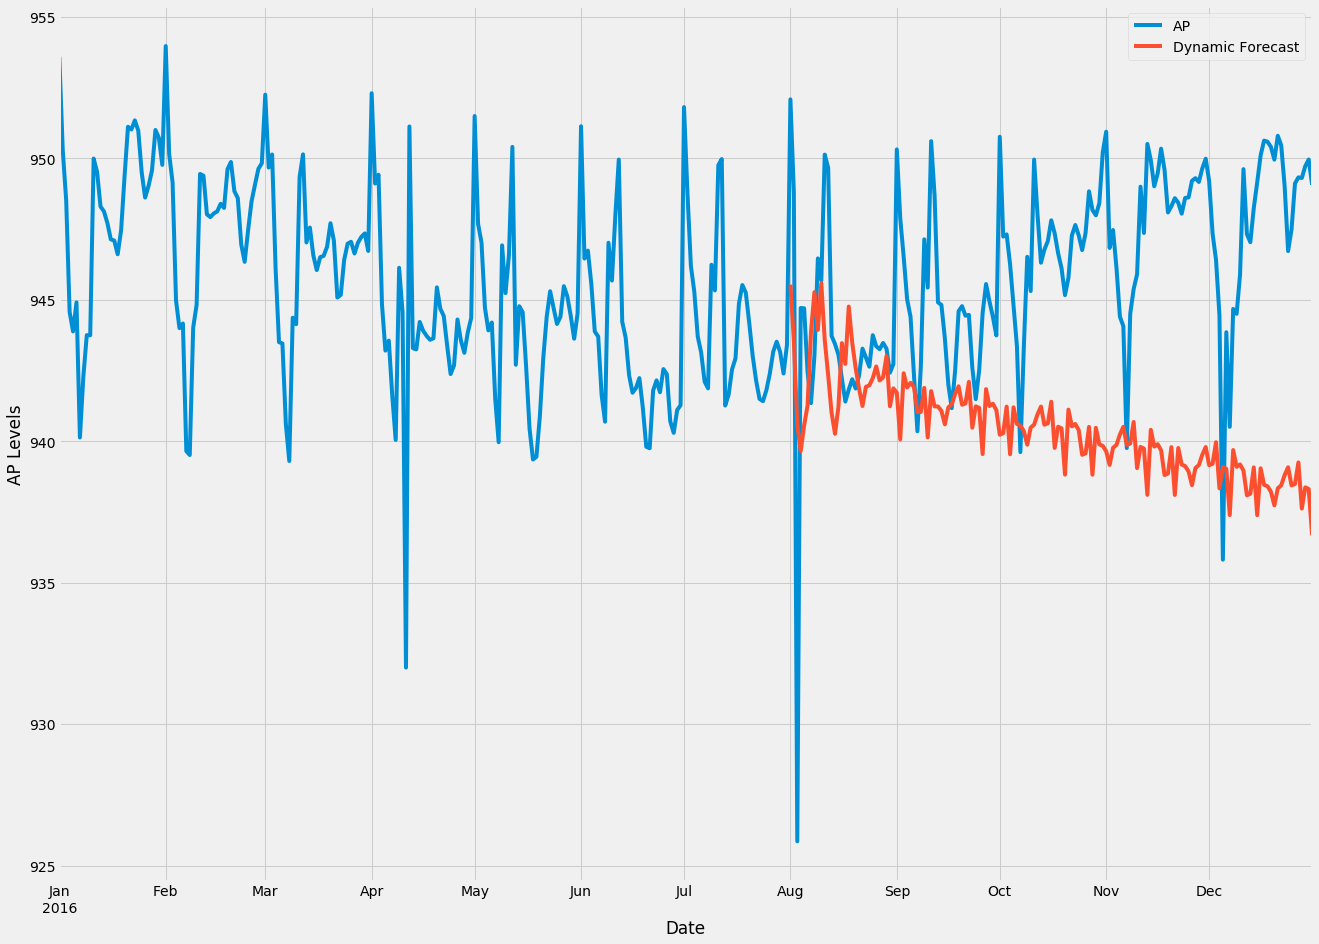

In [190]:
ax = AP.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

#ax.fill_between(pred_dynamic_ci.index,
#                pred_dynamic_ci.iloc[:, 0],
#                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

#ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-08-01'), AP.index[-1],
#                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('AP Levels')

plt.legend()
plt.show()

In [191]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = AP['2016-08-01':]
from sklearn.metrics import mean_squared_error
# Compute the mean square error
mse = mean_squared_error(y_forecasted,y_truth)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 50.4


In [173]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

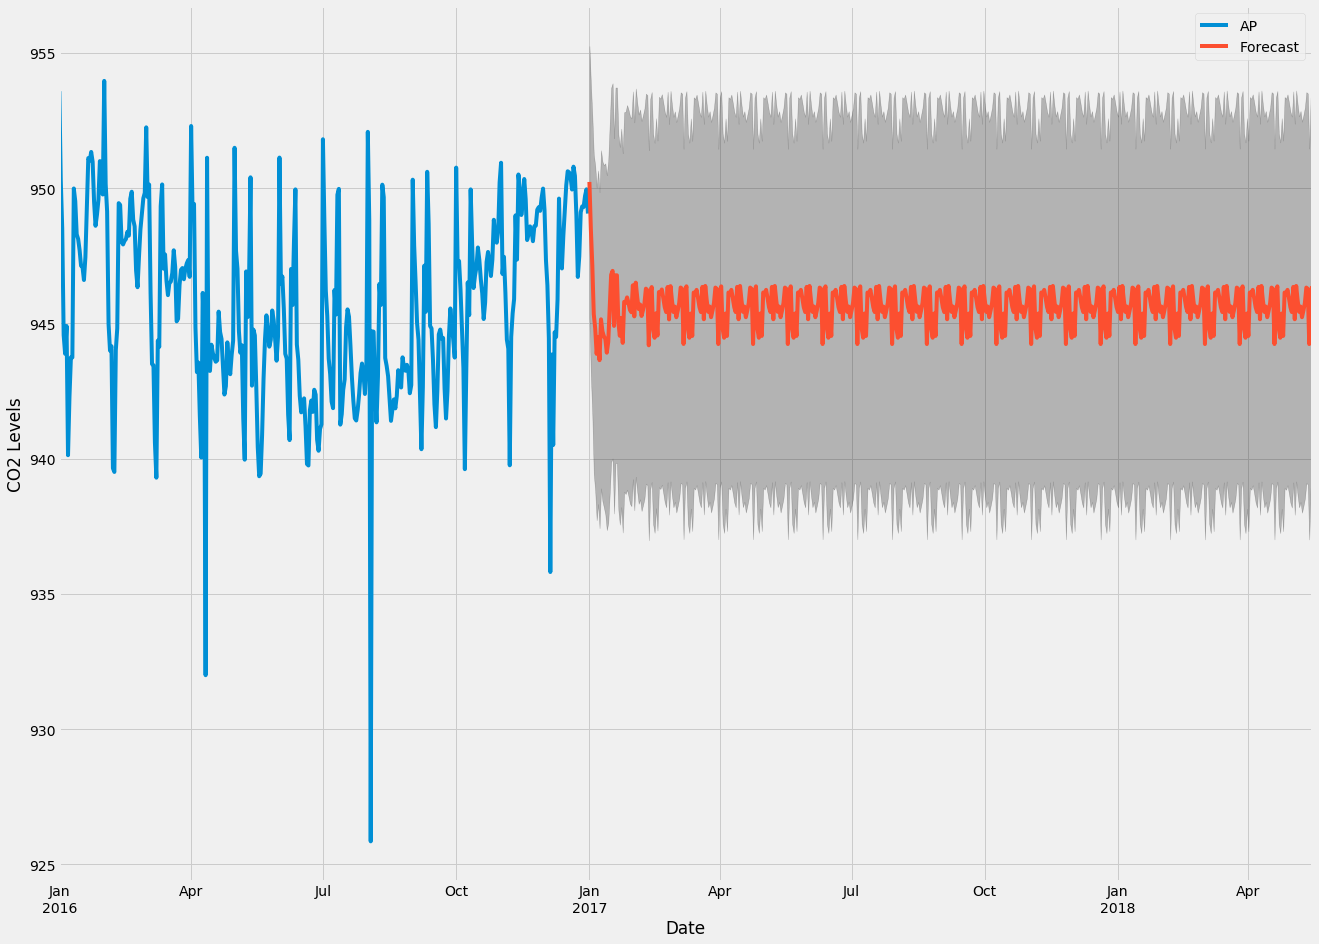

In [174]:
ax = AP.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()